# UTS Machine Learning (Jawaban Soal UTS no 3 - 5)

Anggota Kelompok :
1. Risma Handayani - 222310015
2. Nurul Fikry Solakhudin - 222310051
3. Dimas Permana Lubis - 222310045

Soal no 3

Melakukan preproses data. Detail untuk pengerjaan preproses data adalah sebagai berikut:

a. Pisahkan bagian atribut prediktor dengan label data menjadi dua variabel terpisah

b. Gunakan SimpleImputer untuk menangani missing values, dengan nilai rata-rata dari atribut data sebagai strategi pengisian nilai

c. Terapkan StandardScaler untuk mengubah nilai atribut prediktor berjenis numerik

d. Terapkan preproses data tambahan (jika dibutuhkan)

e. Tampilkan statistik deskriptif dari atribut data sebelum dan setelah dilakukan preproses data

In [1]:
# Import library utama
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [4]:
# Membuat dataset dari tabel
data = {
    'Age': [44,63,63,41,59,57,45,68,57,57,38],
    'Sex': ['M','M','F','M','M','F','M','M','M','F','M'],
    'ChestPainType': ['ASY','ASY','ASY','ATA','ASY','ASY','TA','ASY','ASY','ATA','NAP'],
    'RestingBP': [120,140,124,120,164,140,110,144,np.nan,np.nan,138],
    'Cholesterol': [169,187,197,157,np.nan,241,264,193,131,236,175],
    'FastingBS': [0,0,0,0,1,0,0,1,0,0,0],
    'RestingECG': ['Normal','LVH','Normal','Normal','LVH','Normal','Normal','Normal','Normal','LVH','Normal'],
    'MaxHR': [144,np.nan,136,182,90,123,132,141,115,174,173],
    'ExerciseAngina': ['Y','Y','Y','N','N','Y','N','N','Y','N','N'],
    'Oldpeak': [2.6,4,0,0,1,0.2,1.2,3.4,1.2,0,0],
    'ST_Slope': ['Down','Up','Flat','Up','Flat','Flat','Flat','Flat','Flat','Flat','Up'],
    'HeartDisease': [1,1,1,0,1,1,1,1,1,1,0]
}

df = pd.DataFrame(data)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,44,M,ASY,120.0,169.0,0,Normal,144.0,Y,2.6,Down,1
1,63,M,ASY,140.0,187.0,0,LVH,NaN,Y,4.0,Up,1
2,63,F,ASY,124.0,197.0,0,Normal,136.0,Y,0.0,Flat,1
3,41,M,ATA,120.0,157.0,0,Normal,182.0,N,0.0,Up,0
4,59,M,ASY,164.0,NaN,1,LVH,90.0,N,1.0,Flat,1
5,57,F,ASY,140.0,241.0,0,Normal,123.0,Y,0.2,Flat,1
6,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
7,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
8,57,M,ASY,NaN,131.0,0,Normal,115.0,Y,1.2,Flat,1
9,57,F,ATA,NaN,236.0,0,LVH,174.0,N,0.0,Flat,1


In [5]:
# a. Pisahkan prediktor dan label
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

print("Atribut Prediktor (X):")
display(X.head())

print("\nLabel Data (y):")
display(y.head())


Atribut Prediktor (X):


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,44,M,ASY,120.0,169.0,0,Normal,144.0,Y,2.6,Down
1,63,M,ASY,140.0,187.0,0,LVH,NaN,Y,4.0,Up
2,63,F,ASY,124.0,197.0,0,Normal,136.0,Y,0.0,Flat
3,41,M,ATA,120.0,157.0,0,Normal,182.0,N,0.0,Up
4,59,M,ASY,164.0,NaN,1,LVH,90.0,N,1.0,Flat



Label Data (y):


,HeartDisease
0,1
1,1
2,1
3,0
4,1


In [6]:
# Cek apakah ada nilai yang hilang
print("Cek Missing Values Sebelum Imputasi:")
print(X.isnull().sum())


Cek Missing Values Sebelum Imputasi:
Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        0
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64


In [7]:
# b. SimpleImputer untuk atribut numerik
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

imputer = SimpleImputer(strategy='mean')
X[num_cols] = imputer.fit_transform(X[num_cols])

print("\nSetelah Imputasi Missing Values:")
display(X[num_cols].head())



Setelah Imputasi Missing Values:


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,44.0,120.0,169.0,144.0,2.6
1,63.0,140.0,187.0,141.0,4.0
2,63.0,124.0,197.0,136.0,0.0
3,41.0,120.0,157.0,182.0,0.0
4,59.0,164.0,195.0,90.0,1.0


In [8]:
# c. StandardScaler untuk data numerik
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nSetelah StandardScaler:")
display(X[num_cols].head())



Setelah StandardScaler:


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.021782,-0.953266,-0.698380,0.114815,0.977079
1,0.955555,0.476633,-0.214886,0.000000,1.980214
2,0.955555,-0.667286,0.053722,-0.191358,-0.885885
3,-1.333993,-0.953266,-1.020709,1.569135,-0.885885
4,0.539274,2.192511,0.000000,-1.951850,-0.169360


In [9]:
# d. One-Hot Encoding untuk atribut kategorik
X_encoded = pd.get_dummies(X, drop_first=True)

print("\nDataset setelah One-Hot Encoding:")
display(X_encoded.head())



Dataset setelah One-Hot Encoding:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.021782,-0.953266,-0.698380,0,0.114815,0.977079,True,False,False,False,True,True,False,False
1,0.955555,0.476633,-0.214886,0,0.000000,1.980214,True,False,False,False,False,True,False,True
2,0.955555,-0.667286,0.053722,0,-0.191358,-0.885885,False,False,False,False,True,True,True,False
3,-1.333993,-0.953266,-1.020709,0,1.569135,-0.885885,True,True,False,False,True,False,False,True
4,0.539274,2.192511,0.000000,1,-1.951850,-0.169360,True,False,False,False,False,False,True,False


In [10]:
# e. Statistik deskriptif sebelum preprocessing
print("📊 Statistik Sebelum Preprocessing:")
display(df.describe(include='all'))

# Statistik sesudah preprocessing
print("\n📈 Statistik Setelah Preprocessing:")
display(X_encoded.describe())


📊 Statistik Sebelum Preprocessing:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,11.000000,11,11,9.000000,10.000000,11.000000,11,10.000000,11,11.000000,11,11.000000
unique,NaN,2,4,NaN,NaN,NaN,2,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,8,7,NaN,NaN,NaN,8,NaN,6,NaN,7,NaN
mean,53.818182,NaN,NaN,133.333333,195.000000,0.181818,NaN,141.000000,NaN,1.236364,NaN,0.818182
std,10.077879,NaN,NaN,16.401219,41.158231,0.404520,NaN,28.886752,NaN,1.463744,NaN,0.404520
min,38.000000,NaN,NaN,110.000000,131.000000,0.000000,NaN,90.000000,NaN,0.000000,NaN,0.000000
25%,44.500000,NaN,NaN,120.000000,170.500000,0.000000,NaN,125.250000,NaN,0.000000,NaN,1.000000
50%,57.000000,NaN,NaN,138.000000,190.000000,0.000000,NaN,138.500000,NaN,1.000000,NaN,1.000000
75%,61.000000,NaN,NaN,140.000000,226.250000,0.000000,NaN,165.750000,NaN,1.900000,NaN,1.000000



📈 Statistik Setelah Preprocessing:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,1.100000e+01,1.100000e+01
mean,-1.614870e-16,1.448336e-15,-1.009294e-17,0.181818,2.018587e-17,1.816729e-16
std,1.048809e+00,1.048809e+00,1.048809e+00,0.404520,1.048809e+00,1.048809e+00
min,-1.646205e+00,-1.668215e+00,-1.719089e+00,0.000000,-1.951850e+00,-8.858854e-01
25%,-9.697469e-01,-8.102758e-01,-6.177976e-01,0.000000,-5.166663e-01,-8.858854e-01
50%,3.311331e-01,2.032008e-15,-5.372153e-02,0.000000,0.000000e+00,-1.693604e-01
75%,7.474147e-01,4.766328e-01,5.775065e-01,0.000000,6.697526e-01,4.755120e-01
max,1.475907e+00,2.192511e+00,1.853393e+00,1.000000,1.569135e+00,1.980214e+00


Soal no 4

Membangun model klasifikasi berdasarkan dataset yang telah dilakukan preproses data. Detail untuk pengerjaan klasifikasi adalah sebagai berikut:

a. Gunakan algoritma pengklasifikasi apapun untuk membangun model klasifikasi. Parameter yang digunakan boleh disesuaikan dengan bebas

b. Gunakan metode holdout untuk membagi keseluruhan dataset menjadi data training dan data testing, dengan proporsi 85% data training dan 15% data testing

c. Tampilkan confusion matrix dan akurasi dari model klasifikasi

Confusion Matrix:
[[0 0]
 [0 2]]

Akurasi Model: 100.00%


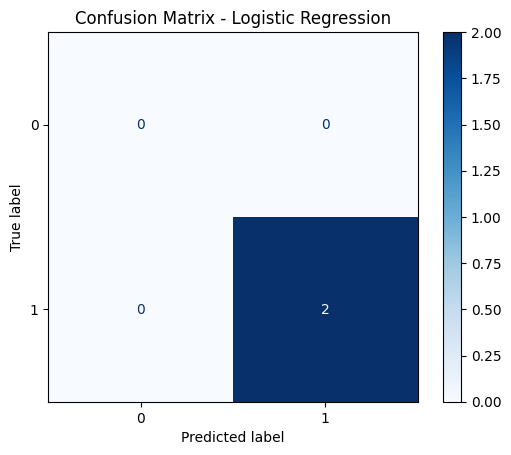

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dataset (contoh dari dataset kamu sebelumnya)
data = {
    'Age': [44,63,63,41,59,57,45,68,57,57,38],
    'Sex': ['M','M','F','M','M','F','M','M','M','F','M'],
    'ChestPainType': ['ASY','ASY','ASY','ATA','ASY','ASY','TA','ASY','ASY','ATA','NAP'],
    'RestingBP': [120,140,np.nan,120,164,140,110,144,131,236,138],
    'Cholesterol': [169,187,197,157,131,241,264,193,131,236,175],
    'FastingBS': [0,0,0,0,1,0,0,1,0,0,0],
    'RestingECG': ['Normal','LVH','Normal','Normal','LVH','Normal','Normal','Normal','Normal','LVH','Normal'],
    'MaxHR': [144,187,136,182,90,123,132,141,115,174,173],
    'ExerciseAngina': ['Y','Y','Y','N','N','Y','N','N','Y','N','N'],
    'Oldpeak': [2.6,4,0,0,1,0.2,1.2,3.4,1.2,0,0],
    'ST_Slope': ['Down','Up','Flat','Up','Flat','Flat','Flat','Flat','Flat','Flat','Up'],
    'HeartDisease': [1,1,1,0,1,1,1,1,1,1,0]
}
df = pd.DataFrame(data)

# --- Tangani missing value ---
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['RestingBP']] = imputer.fit_transform(df[['RestingBP']])

# --- Ubah kolom kategorik jadi numerik ---
df_encoded = pd.get_dummies(df, drop_first=True)

# Pisahkan fitur (X) dan label (y)
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']

# Bagi data (85% train, 15% test) dengan stratifikasi label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Bangun model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nAkurasi Model: {:.2f}%".format(acc * 100))

# Visualisasi matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Soal no 5

Membangun model clustering berdasarkan dataset yang telah dilakukan preproses data. Detail untuk pengerjaan clustering adalah sebagai berikut:

a. Gunakan algoritma clustering apapun untuk melakukan clustering. Parameter yang digunakan boleh disesuaikan dengan bebas

b. Tampilkan SSE dan silhouette score dari model clustering

SSE (Sum of Squared Errors): 28074.00
Silhouette Score: 0.3110


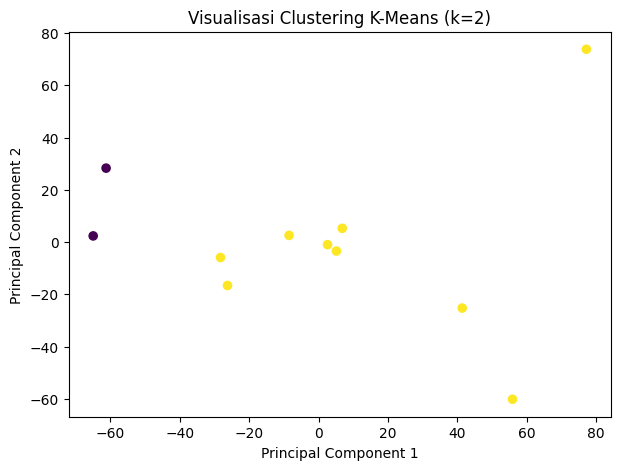

In [28]:
# 🧩 NOMOR 5 - MODEL CLUSTERING

# 1️⃣ Import library
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2️⃣ Siapkan data hasil preprocessing (tanpa label)
X_cluster = df.drop(columns=['HeartDisease']).copy()

# 3️⃣ Encode kolom kategorik agar numerik
le = LabelEncoder()
for col in X_cluster.columns:
    if X_cluster[col].dtype == 'object':
        X_cluster[col] = le.fit_transform(X_cluster[col])

# 4️⃣ Bangun model K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_cluster)

# 5️⃣ Hitung SSE dan Silhouette Score
labels = kmeans.labels_
sse = kmeans.inertia_
sil_score = silhouette_score(X_cluster, labels)

print(f"SSE (Sum of Squared Errors): {sse:.2f}")
print(f"Silhouette Score: {sil_score:.4f}")

# 6️⃣ Visualisasi hasil clustering dengan PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=35)
plt.title("Visualisasi Clustering K-Means (k=2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()